Jhon Alexander Segura Dorado

### Date:
2025-03-24

### Descripci√≥n:

**Aspectos a Considerar:**

1. Descripci√≥n y Estructura del Dataset:

* Familiarse con los atributos del dataset.
*  la relevancia de cada atributo en la detecci√≥n de falsificaciones.

2. Distribuci√≥n y Patrones:

* Identifica tendencias generales en los datos.
* Detecta anomal√≠as o concentraciones inusuales que puedan indicar falsificaciones.

3. Relaciones y Correlaciones:

* Explora las conexiones entre diferentes factores.
* Determina qu√© caracter√≠sticas podr√≠an ser indicativas de productos falsificados.

4. An√°lisis Adicional:

* Piensa fuera de la caja: el dataset puede ofrecer oportunidades para proponer estrategias innovadoras.
* Busca hallazgos inesperados que puedan surgir del an√°lisis.
* Prop√≥n estrategias adicionales que podr√≠an mejorar la detecci√≥n de falsificaciones.

5. Presentaci√≥n de Resultados:

* Presenta tus resultados de forma clara y concisa.
* Resalta tendencias clave y oportunidades de mejora.
* Identifica √°reas que merecen mayor investigaci√≥n.

**Preguntas Clave:**

Impacto en el Marketplace:

* ¬øPor qu√© es esencial identificar y eliminar productos falsificados?
* ¬øC√≥mo afecta esto a los compradores, vendedores y a la plataforma en general?

Estrategias de Detecci√≥n:

* Si pudieras dise√±ar nuevas formas de identificar productos falsificados
* ¬øqu√© t√°cticas o fuentes de informaci√≥n considerar√≠as?

Evasi√≥n de Reglas por Parte de Vendedores:

* ¬øC√≥mo crees que algunos vendedores podr√≠an intentar evadir las reglas para seguir operando?
* ¬øQu√© soluciones propondr√≠as para adelantarnos a esas t√°cticas?

## üìö Importar Lirerias

In [3]:
import pandas as pd
import numpy as np
import os as os
import sys
import matplotlib.pyplot as plt

## üíæ Cargar Datos

In [4]:
# Definir la ruta de la carpeta base
carpeta_base = r"C:\Users\jsegura\2024Informaci√≥n\PROYECTOS_MACHINE\Mercado_Libre\Data"

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_base)

# Imprimir el total de archivos
print(f'Total de archivos en la carpeta {carpeta_base}: {len(archivos_en_carpeta)}')

# Imprimir la lista de nombres de archivos
print('Archivos en la carpeta:')
for nombre_archivo in archivos_en_carpeta:
    print(nombre_archivo)

Total de archivos en la carpeta C:\Users\2024Informaci√≥n\PROYECTOS_MACHINE\Mercado_Libre\Data: 1
Archivos en la carpeta:
DataBase.xlsx


## üë∑ Ingenier√≠a de caracter√≠sticas

### Estructura de los datos

Se identifican las columnas y fuentes de datos de cada archivo para obtener un primer acercamiento a las variables.

In [5]:
# Imprimir la lista de nombres de archivos y sus columnas
print('Archivos en la carpeta y sus columnas:')
for nombre_archivo in archivos_en_carpeta:
    # Construir la ruta completa del archivo
    ruta_archivo = os.path.join(carpeta_base, nombre_archivo)
    
    # Leer el archivo y obtener las columnas
    try:
        df = pd.read_excel(ruta_archivo)
        columnas = df.columns.tolist()
        print(f'Archivo: {nombre_archivo}')
        print(f'Columnas: {columnas}')
    except Exception as e:
        print(f'No se pudo leer el archivo {nombre_archivo}. Error: {e}')

Archivos en la carpeta y sus columnas:
Archivo: DataBase.xlsx
Columnas: ['element_id', 'site_id', 'seller_id', 'Dominio_normalizado', 'Titulo', 'Marca', 'Precio', 'Rule', 'Score', 'Total', 'Moderado', 'Fake', 'Rollback', 'FK_TEST1', 'FK_TEST2']


| Campo                | Descripci√≥n                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| 1. element_id        | Id de producto                                                              |
| 2. site_id           | Pa√≠s                                                                        |
| 3. seller_id         | Id del vendedor                                                             |
| 4. Dominio_normalizado | Categor√≠a del producto                                                     |
| 5. Titulo            | T√≠tulo del producto                                                         |
| 6. Marca             | Marca publicada del producto                                                |
| 7. Precio            | Precio del producto                                                         |
| 8. Rule              | Regla con la que se moder√≥ la publicaci√≥n                                    |
| 9. Score             | Score del modelo de Machine Learning. Utilizado por la regla "FK_MODELO"    |
| 10. Moderado         | Flag que indica que el producto fue moderado por alguna regla               |
| 11. Fake             | Flag que indica que el producto es un producto falsificado. Taggeado de forma manual |
| 12. Rollback         | Flag que indica que luego de la moderaci√≥n, la misma fue revertida por un operador de Atenci√≥n al Cliente ante reclamo de usuario |
| 13. FK_TEST1         | Regla de test. Actualmente apagada. Si detecta que es Fake, FK_TEST1 = 1    |
| 14. FK_TEST2         | Regla de test. Actualmente apagada. Si detecta que es Fake, FK_TEST2 = 1    |


### Perfilamiento de los datos

En este paso se seleccionan aleatoriamente dos filas del DataFrame **Data** para obtener una primera aproximaci√≥n a los datos. Esto permite identificar si alguna columna del DataFrame contiene un diccionario, facilitando as√≠ la revisi√≥n y an√°lisis inicial de la estructura de los datos.

In [6]:
# Funci√≥n para mostrar una muestra aleatoria de 2 filas y transponer el DataFrame
def mostrar_muestra_transpuesta(datos, nombre):
    """
    Muestra una muestra aleatoria de 2 filas del DataFrame y la transpone.
    
    Parameters:
    datos (DataFrame): El DataFrame del cual se tomar√° la muestra.
    nombre (str): El nombre del DataFrame para imprimir en los resultados.
    """
    muestra = datos.sample(n=2, random_state=1)
    muestra_transpuesta = muestra.T
    print(f"DataFrame transpuesto de {nombre}:\n", muestra_transpuesta)

# Leer y mostrar muestras transpuestas de los archivos Excel en la carpeta
for nombre_archivo in archivos_en_carpeta:
    if nombre_archivo.endswith('.xlsx'):
        ruta_archivo = os.path.join(carpeta_base, nombre_archivo)
        datos = pd.read_excel(ruta_archivo)
        mostrar_muestra_transpuesta(datos, nombre_archivo)

DataFrame transpuesto de DataBase.xlsx:
                                                                  28229  \
element_id                                               COL1152976735   
site_id                                                       COLOMBIA   
seller_id                                                   2305132768   
Dominio_normalizado                          FACIAL_SKIN_CARE_PRODUCTS   
Titulo               La Roche Posay Effaclar Bb Blur Unificador Ant...   
Marca                                                   La Roche-Posay   
Precio                                                        188000.0   
Rule                                                               NaN   
Score                                                             0.16   
Total                                                                1   
Moderado                                                             0   
Fake                                                                 0 

### Tipo de datos

### Identificaci√≥n de datos nulos

Se procede a identificar los datos nulos en el DataFrame, lo cual es un paso crucial en el preprocesamiento de datos. Este proceso nos permite determinar si alguna columna requiere un tratamiento adicional, como la imputaci√≥n de valores faltantes mediante la media u otros m√©todos.

In [7]:
# Funci√≥n para obtener informaci√≥n de la estructura de datos y calcular el porcentaje de datos no nulos
def analizar_datos(df, nombre_df):
    """
    Imprime la informaci√≥n de la estructura de datos y calcula el porcentaje de datos no nulos.
    
    Parameters:
    df (DataFrame): El DataFrame a analizar.
    nombre_df (str): El nombre del DataFrame para imprimir en los resultados.
    """
    print(f"Informaci√≥n del DataFrame {nombre_df}:")
    df.info()
    porcentaje_no_nulos = df.notnull().mean() * 100
    print(f"\nPorcentaje de datos no nulos en {nombre_df}:\n{porcentaje_no_nulos}\n")

# Leer y mostrar tipos de datos y an√°lisis de los archivos Excel en la carpeta
for nombre_archivo in archivos_en_carpeta:
    if nombre_archivo.endswith('.xlsx'):
        ruta_archivo = os.path.join(carpeta_base, nombre_archivo)
        datos = pd.read_excel(ruta_archivo)
        analizar_datos(datos, nombre_archivo)

Informaci√≥n del DataFrame DataBase.xlsx:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40372 entries, 0 to 40371
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   element_id           40372 non-null  object 
 1   site_id              40372 non-null  object 
 2   seller_id            40372 non-null  int64  
 3   Dominio_normalizado  40372 non-null  object 
 4   Titulo               40372 non-null  object 
 5   Marca                40372 non-null  object 
 6   Precio               40372 non-null  float64
 7   Rule                 4278 non-null   object 
 8   Score                40372 non-null  float64
 9   Total                40372 non-null  int64  
 10  Moderado             40372 non-null  int64  
 11  Fake                 40372 non-null  int64  
 12  Rollback             40372 non-null  int64  
 13  FK_TEST1             40372 non-null  int64  
 14  FK_TEST2             40372 non-null  int64  

Los datos no contienen filas duplicadas y la √∫nica columna con valores faltantes es "Regla". Esta variable no se puede eliminar debido a su importancia, ya que representa la regla con la que se moder√≥ la publicaci√≥n. Por lo tanto, se propone reemplazar los datos en blanco con una etiqueta que diga "No Fue Aplicada la Regla".

### Visualizaci√≥n de las variables Categoricas

In [8]:
# Explorar las columnas categ√≥ricas
for column in df.select_dtypes(include=['object']):
  print(f"Column: {column}")
  print(datos[column].unique())
  print("-" * 20)

Column: element_id
['ARG1000130348' 'ARG1002056504' 'ARG1002630435' ... 'PER9980515950'
 'PER999421010' 'PER9998709046']
--------------------
Column: site_id
['ARGENTINA' 'BRASIL' 'CHILE' 'COLOMBIA' 'MEXICO' 'PERU']
--------------------
Column: Dominio_normalizado
['COMPUTER_PROCESSORS' 'COMPUTER_MONITORS' 'SUNGLASSES'
 'HARD_DRIVES_AND_SSDS' 'RAM_MEMORY_MODULES' 'SPEAKERS' 'TONERS'
 'NOTEBOOKS' 'CELLPHONES' 'WRISTWATCHES' 'SMARTWATCHES' 'HEADPHONES'
 'PERFUMES' 'FACIAL_SKIN_CARE_PRODUCTS' 'MEMORY_CARDS' 'INK_CARTRIDGES'
 'MOBILE_DEVICE_CHARGERS' 'COMPUTER_MICE' 'MICROPHONES'
 'DATA_CABLES_AND_ADAPTERS' 'SUNSCREENS' 'BODY_SKIN_CARE_PRODUCTS'
 'GAMEPADS_AND_JOYSTICKS' 'PRINTER_INKS' 'LAPTOP_CHARGERS'
 'TV_REMOTE_CONTROLS' 'AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS']
--------------------
Column: Titulo
['Microprocesador Intel Core I3 12100 12mb Bx8071512100 3.3ghz Socket 1700 4 N√∫cleos 8 Hilos 12va Generaci√≥n Socket Fclga1700 Intel Hd Graphics X86-64 Ddr4'
 'Monitor Gamer Samsung Con Pantall

### Remplazo de la varible Rule

In [9]:
datos['Rule'].fillna("No Fue Aplicada la Regla", inplace=True)

### Exploraci√≥n de la Data

En esta secci√≥n, se realiza un an√°lisis exploratorio de las variables num√©ricas clave: 'Moderado', 'Fake', 'Rollback' , 'Precio' y 'Score'. El objetivo es comprender la distribuci√≥n de estas variables y detectar posibles patrones o anomal√≠as que puedan aportar informaci√≥n relevante para la detecci√≥n de productos falsificados. Para ello, se utilizar√°n histogramas y diagramas de caja. A trav√©s de la combinaci√≥n de estas t√©cnicas de visualizaci√≥n, se espera obtener una visi√≥n clara de la distribuci√≥n de las variables num√©ricas y extraer insights preliminares que gu√≠en el an√°lisis posterior.

Column: Moderado
count    40372.000000
mean         0.105965
std          0.307796
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Moderado, dtype: float64


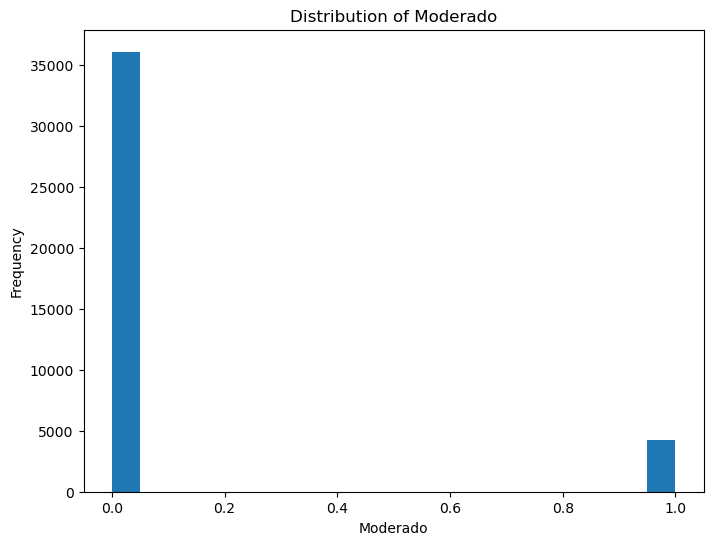

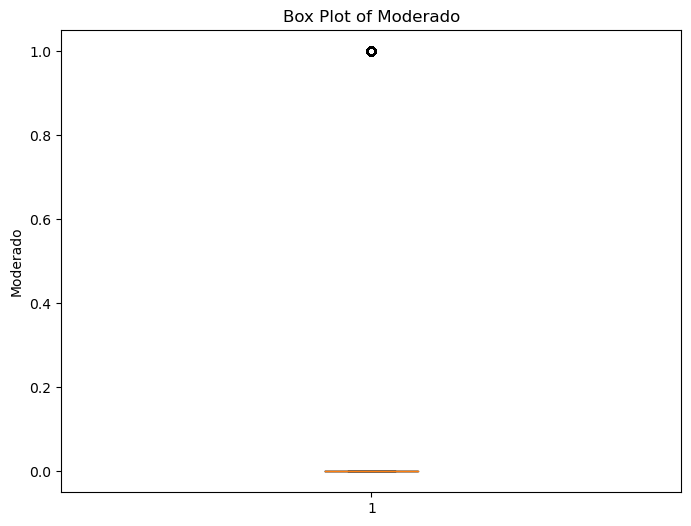

--------------------
Column: Fake
count    40372.000000
mean         0.111191
std          0.314372
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Fake, dtype: float64


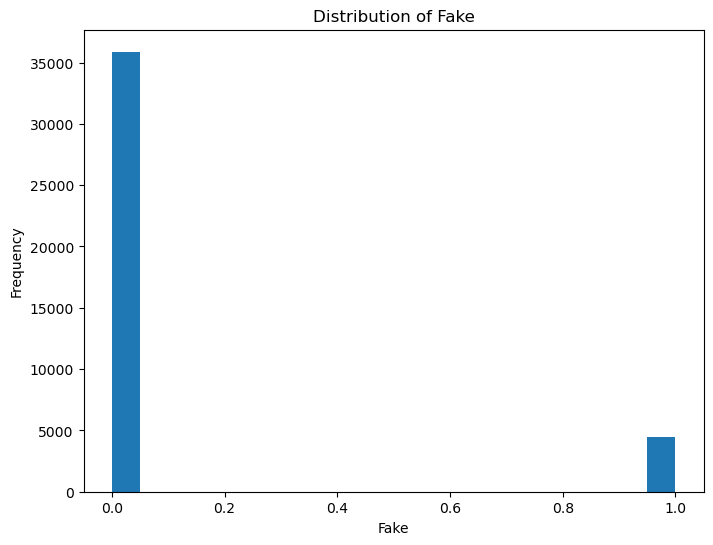

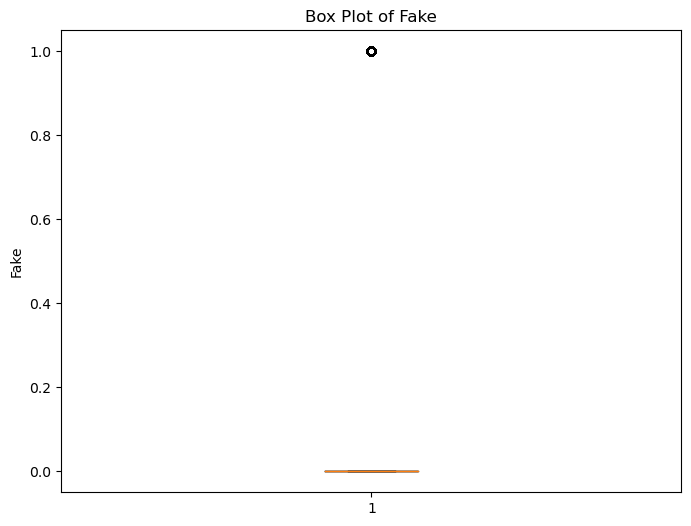

--------------------
Column: Rollback
count    40372.000000
mean         0.007580
std          0.086731
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Rollback, dtype: float64


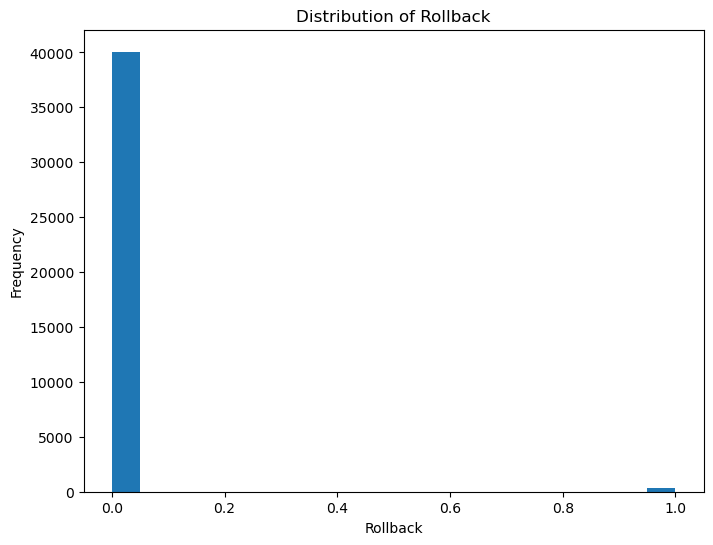

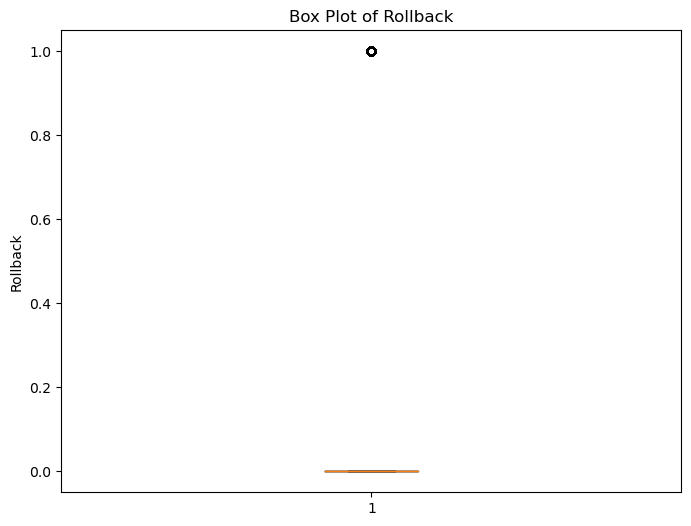

--------------------
Column: Precio
count    4.037200e+04
mean     2.455866e+05
std      6.435465e+05
min      1.117000e+01
25%      6.767050e+02
50%      4.299000e+03
75%      1.549900e+05
max      1.289990e+07
Name: Precio, dtype: float64


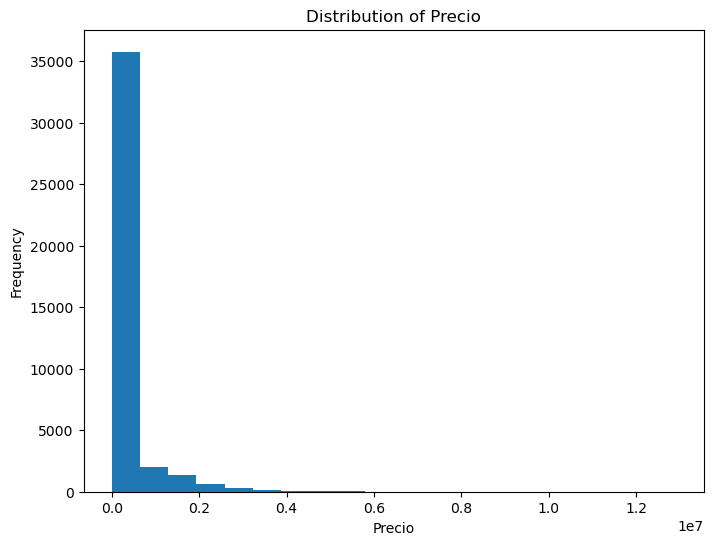

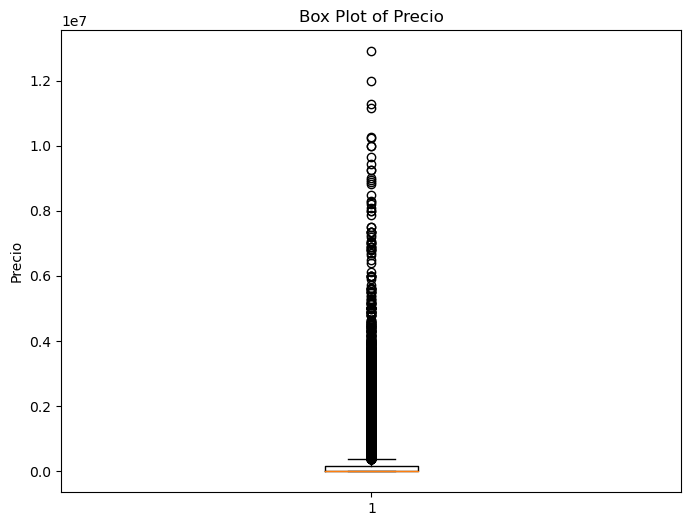

--------------------


In [10]:
columns_to_analyze = ['Moderado', 'Fake', 'Rollback', 'Precio']

for column in columns_to_analyze:
  print(f"Column: {column}")
  print(datos[column].describe())

  plt.figure(figsize=(8, 6))
  plt.hist(datos[column], bins=20)
  plt.title(f"Distribution of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

  plt.figure(figsize=(8, 6))
  plt.boxplot(datos[column])
  plt.title(f"Box Plot of {column}")
  plt.ylabel(column)
  plt.show()

  print("-" * 20)

**Moderado**

- Histograma: El histograma muestra una gran concentraci√≥n de valores en 0 y una barra mucho m√°s peque√±a en 1, indica que la mayor√≠a de los productos no han sido moderados y solo una peque√±a proporci√≥n ha pasado por un proceso de moderaci√≥n. Esto podr√≠a sugerir que el sistema de moderaci√≥n actual es selectivo o que la prevalencia de productos problem√°ticos es baja.

- Diagrama de caja: En el diagrama de caja con la mediana cerca de 0 y pocos o ning√∫n valor at√≠pico refuerza la idea de que la moderaci√≥n es poco frecuente. Si hubiera valores at√≠picos (outliers) en 1, estos podr√≠an representar productos que han sido moderados repetidamente, lo que podr√≠a ser un indicio de comportamiento sospechoso o de productos problem√°ticos.

**Fake**

- Histograma: El histograma muestra una mayor concentraci√≥n en 0 que en 1, indica que hay m√°s productos genuinos que falsos en el conjunto de datos. La proporci√≥n entre las barras de 0 y 1 da una idea de la prevalencia de productos falsificados.

- Diagrama de caja: Dado que 'Fake' es una variable binaria, el diagrama de caja mostrar√° principalmente la mediana en 0 o 1, indicando si la mayor√≠a de los productos son genuinos o falsos. No se esperan valores at√≠picos en este caso, ya que solo hay dos valores posibles.

**Rollback**

- Histograma: En el histograma se mira una concentraci√≥n en 0 y una barra mucho m√°s peque√±a en 1 sugiere que la mayor√≠a de las moderaciones no son revertidas (rollback). Esto indicar√≠a que el sistema de moderaci√≥n es generalmente preciso en sus decisiones.

- Diagrama de caja: Para el diagrama de caja como la mediana esta cerca de 0 y pocos o ning√∫n valor at√≠pico refuerza la idea de que las reversiones de moderaci√≥n son poco frecuentes. Si hubiera valores at√≠picos (outliers) en 1, estos podr√≠an representar productos con un n√∫mero inusualmente alto de reversiones, lo que podr√≠a indicar problemas con la aplicaci√≥n de las reglas de moderaci√≥n.


**Precio**

- Histograma: El histograma muestra una distribuci√≥n asim√©trica positiva o sesgada a la derecha. Esto significa que la mayor√≠a de los precios se concentran en valores bajos, con una "cola" larga que se extiende hacia la derecha, representando los precios m√°s altos.

- Diagrama de caja: El box plot confirma la asimetr√≠a a la derecha de la distribuci√≥n, ya que la mediana se encuentra m√°s cerca del extremo inferior de la caja y hay una mayor cantidad de valores at√≠picos en el extremo superior.

### Calcula el porcentaje de productos moderados y no moderados y analiza la distribuci√≥n y relaci√≥n entre las columnas 'Moderado' y 'Falso'.

In [11]:
moderated_percentage = (datos['Moderado'].sum() / len(datos)) * 100
non_moderated_percentage = 100 - moderated_percentage

print(f"Porcentaje de productos moderados: {moderated_percentage:.2f}%")
print(f"Porcentaje de productos no moderados: {non_moderated_percentage:.2f}%")


print("\nDistribution of 'Moderado' and 'Fake' columns:")
print(pd.crosstab(datos['Moderado'], datos['Fake'], normalize='index') * 100)


fake_moderated_percentage = (datos[(datos['Fake'] == 1) & (datos['Moderado'] == 1)].shape[0] / datos[datos['Fake'] == 1].shape[0]) * 100
print(f"\nPorcentaje de productos 'Fake' que fueron moderados: {fake_moderated_percentage:.2f}%")

Porcentaje de productos moderados: 10.60%
Porcentaje de productos no moderados: 89.40%

Distribution of 'Moderado' and 'Fake' columns:
Fake              0          1
Moderado                      
0         98.512218   1.487782
1          7.620383  92.379617

Porcentaje de productos 'Fake' que fueron moderados: 88.04%


**Porcentaje:**

- Porcentaje de productos moderados: Esto indica que solo el 10.60% de los productos en el conjunto de datos fueron moderados.

- Porcentaje de productos no moderados: La gran mayor√≠a de los productos (89.40%) no fueron moderados.

**Distribuci√≥n**

- La fila Moderado = 0 muestra la distribuci√≥n de productos que no fueron moderados:
El 98.51% de los productos no moderados no eran falsos (Fake = 0).
Solo el 1.49% de los productos no moderados eran falsos (Fake = 1).

- La fila Moderado = 1 muestra la distribuci√≥n de los productos que s√≠ fueron moderados:
El 7.62% de los productos moderados no eran falsos (Fake = 0).
El 92.38% de los productos moderados eran falsos (Fake = 1).

Por otro lado, los productos etiquetados como "Fake", el 88.04% fueron moderados.


**Interpretaci√≥n General:**

La gran mayor√≠a de los productos moderados el  92.37% son productos que tambi√©n est√°n etiquetados como "Fake". Esto indica que el sistema de moderaci√≥n est√° funcionando para identificar y tomar medidas sobre los productos falsos. La moderaci√≥n podr√≠a ser m√°s amplia, dado que el porcentaje total de productos moderados es bajo (10.60%), es posible que se encuentren productos falsos que no est√©n siendo moderados. Esto permite mejorar la cobertura y moderar m√°s productos potencialmente problem√°ticos.

### Explorar la relaci√≥n entre 'Dominio_normalizado' y 'Marca' para encontrar las categor√≠as de productos y marcas m√°s afectadas por las moderaciones y las falsificaciones.

In [12]:

site_moderation_rates = datos.groupby('site_id')['Moderado'].mean() * 100
print("\nTasas de moderaci√≥n por Site ID:\n", site_moderation_rates)


domain_moderation_rates = datos.groupby('Dominio_normalizado')['Moderado'].mean() * 100
print("\nTasas de moderaci√≥n por Dominio_normalizado:\n", domain_moderation_rates)


brand_moderation_rates = datos.groupby('Marca')['Moderado'].mean() * 100
print("\nTasas de moderaci√≥n por Marca:\n", brand_moderation_rates)


Tasas de moderaci√≥n por Site ID:
 site_id
ARGENTINA    10.571285
BRASIL       10.458210
CHILE        10.444234
COLOMBIA     10.176125
MEXICO       10.384340
PERU         13.568985
Name: Moderado, dtype: float64

Tasas de moderaci√≥n por Dominio_normalizado:
 Dominio_normalizado
AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS    31.250000
BODY_SKIN_CARE_PRODUCTS                11.956522
CELLPHONES                             10.015320
COMPUTER_MICE                          11.379310
COMPUTER_MONITORS                      10.502693
COMPUTER_PROCESSORS                     9.213251
DATA_CABLES_AND_ADAPTERS               22.957198
FACIAL_SKIN_CARE_PRODUCTS              10.722348
GAMEPADS_AND_JOYSTICKS                 15.686275
HARD_DRIVES_AND_SSDS                   10.175439
HEADPHONES                             10.531915
INK_CARTRIDGES                         10.985353
LAPTOP_CHARGERS                         7.407407
MEMORY_CARDS                           11.211301
MICROPHONES                      

### Parte 1:

La lista anterior muestra los 'seller_id' de los vendedores con una alta tasa de moderaci√≥n. El valor asociado a cada seller_id representa la proporci√≥n de productos de ese vendedor que fueron moderados. Por ejemplo, el vendedor con seller_id 5508796 tuvo todos sus productos (1.000000 o 100%) moderados. Estos vendedores presentan un porcentaje significativamente alto de productos moderados, lo que podr√≠a indicar un comportamiento sospechoso o la publicaci√≥n frecuente de productos que infringen las reglas. Se recomienda investigar m√°s a fondo a estos vendedores para determinar si est√°n involucrados en actividades fraudulentas o si necesitan ser contactados para revisar sus pr√°cticas de publicaci√≥n.

### Parte 2:

La segunda parte de la lista muestra las combinaciones de categor√≠as de productos (Dominio_normalizado) y pa√≠ses (site_id) con una alta tasa de moderaci√≥n. El valor asociado a cada combinaci√≥n representa la proporci√≥n de productos de esa categor√≠a y pa√≠s que fueron moderados. Por ejemplo, todos los productos de la categor√≠a "AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS" publicados en Per√∫ (site_id = PERU) fueron moderados (1.000000 o 100%). Algunas categor√≠as de productos en ciertos pa√≠ses tienen una probabilidad mucho mayor de ser moderadas. Esto podr√≠a deberse a varios factores, como una mayor prevalencia de productos falsificados en esas categor√≠as y pa√≠ses, o reglas de moderaci√≥n m√°s estrictas para ciertos tipos de productos en regiones espec√≠ficas.

### Tasa de moderaci√≥n para cada dominio o categor√≠a de producto

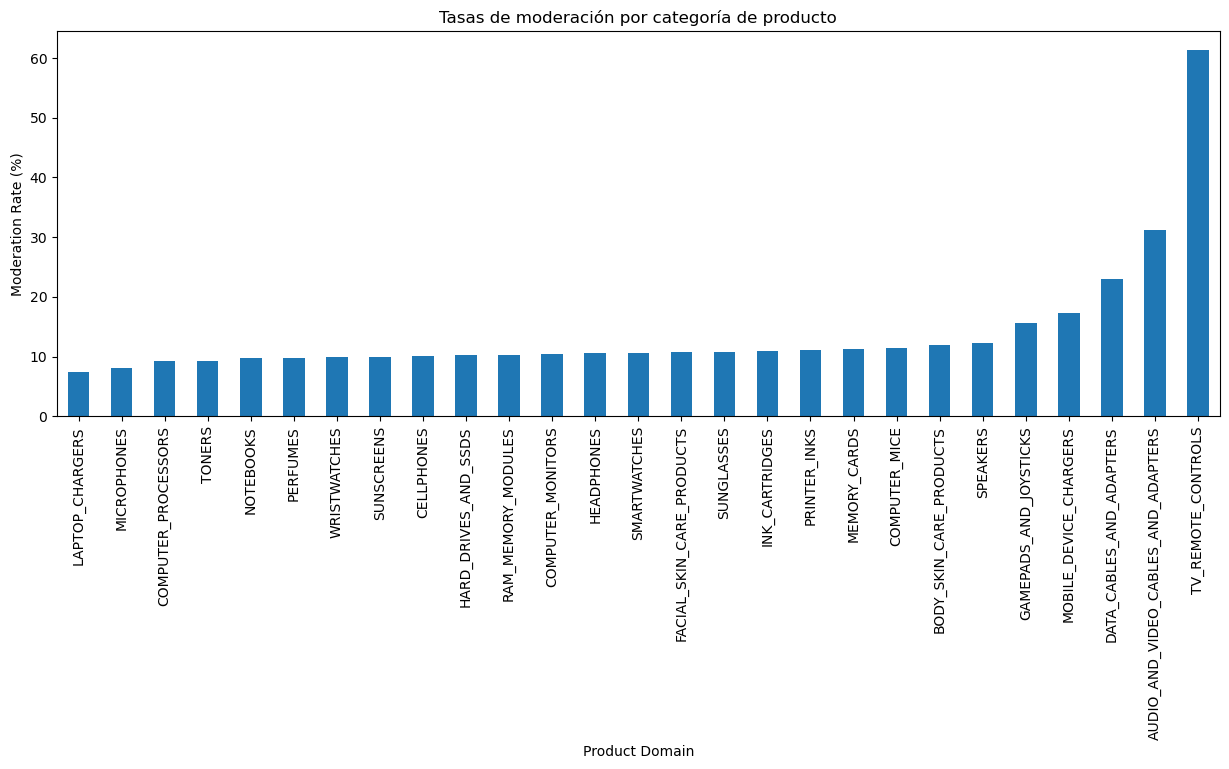

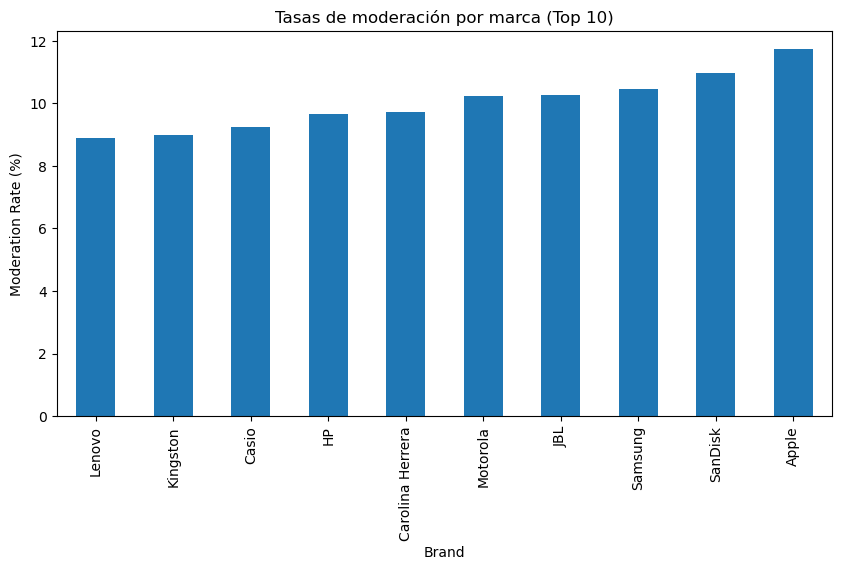

In [13]:

plt.figure(figsize=(15, 5))
domain_moderation_rates.sort_values().plot(kind='bar')
plt.xlabel('Product Domain')
plt.ylabel('Moderation Rate (%)')
plt.title('Tasas de moderaci√≥n por categor√≠a de producto')
plt.xticks(rotation=90)
plt.show()


top_brands = datos['Marca'].value_counts().head(10).index
brand_moderation_rates_top = brand_moderation_rates[brand_moderation_rates.index.isin(top_brands)]
plt.figure(figsize=(10, 5))
brand_moderation_rates_top.sort_values().plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Moderation Rate (%)')
plt.title('Tasas de moderaci√≥n por marca (Top 10)')
plt.show()

La gr√°fica muestra una variaci√≥n significativa en las tasas de moderaci√≥n entre las diferentes categor√≠as de productos. Algunas categor√≠as tienen tasas de moderaci√≥n muy bajas (cercanas al 0%), mientras que otras tienen tasas mucho m√°s altas (superiores al 20% o incluso al 40%).

Categor√≠as con altas tasas de moderaci√≥n: Las categor√≠as con las tasas de moderaci√≥n m√°s altas son:

- TV_REMOTE_CONTROLS
- AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS
- DATA_CABLES_AND_ADAPTERS
- LAPTOP_CHARGERS
- CELL_PHONE_CHARGERS

Esto sugiere que estas categor√≠as podr√≠an ser m√°s propensas a tener productos falsificados o que infringen las reglas de la plataforma, lo que lleva a una mayor necesidad de moderaci√≥n. Muchas categor√≠as tienen tasas de moderaci√≥n muy bajas, lo que indica que la mayor√≠a de los productos en esas categor√≠as no requieren moderaci√≥n.

La gr√°fica revela que la necesidad de moderaci√≥n var√≠a significativamente entre las categor√≠as de productos. Las categor√≠as con altas tasas de moderaci√≥n deben ser objeto de mayor atenci√≥n y escrutinio, ya que podr√≠an ser m√°s vulnerables a la presencia de productos falsificados o que infringen las reglas.

### An√°lisis detallado de las principales categor√≠as de productos y marcas con las tasas de moderaci√≥n m√°s altas

In [14]:

top_domain_moderation = domain_moderation_rates.sort_values(ascending=False).head(5)
print("\nLas 5 categor√≠as de productos con mayor √≠ndice de moderaci√≥n:\n", top_domain_moderation)

top_brand_moderation = brand_moderation_rates.sort_values(ascending=False).head(5)
print("\nLas 5 marcas principales con las tasas de moderaci√≥n m√°s altas:\n", top_brand_moderation)

for category in top_domain_moderation.index:
    category_df = df[df['Dominio_normalizado'] == category]
    print(f"\nAn√°lisis por categor√≠a: {category}")
    print("Puntuaci√≥n promedio:", category_df['Score'].mean())
    print("Porcentaje falso:", (category_df['Fake'].sum() / len(category_df)) * 100)
    print("Precio medio:", category_df['Precio'].mean())

for brand in top_brand_moderation.index:
    brand_df = df[df['Marca'] == brand]
    print(f"\nAnalysis for brand: {brand}")
    print("Puntuaci√≥n promedio:", brand_df['Score'].mean())
    print("Porcentaje falso:", (brand_df['Fake'].sum() / len(brand_df)) * 100)
    print("Precio medio:", brand_df['Precio'].mean())



Las 5 categor√≠as de productos con mayor √≠ndice de moderaci√≥n:
 Dominio_normalizado
TV_REMOTE_CONTROLS                     61.428571
AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS    31.250000
DATA_CABLES_AND_ADAPTERS               22.957198
MOBILE_DEVICE_CHARGERS                 17.365269
GAMEPADS_AND_JOYSTICKS                 15.686275
Name: Moderado, dtype: float64

Las 5 marcas principales con las tasas de moderaci√≥n m√°s altas:
 Marca
Segunda marca Ray-Ban    100.0
Simil HP                 100.0
Segunda marca HP         100.0
Segunda marca Intel      100.0
Segunda marca JBL        100.0
Name: Moderado, dtype: float64

An√°lisis por categor√≠a: TV_REMOTE_CONTROLS
Puntuaci√≥n promedio: 0.7221428571428572
Porcentaje falso: 10.0
Precio medio: 4000.3051428571416

An√°lisis por categor√≠a: AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS
Puntuaci√≥n promedio: 0.555625
Porcentaje falso: 18.75
Precio medio: 10914.738125

An√°lisis por categor√≠a: DATA_CABLES_AND_ADAPTERS
Puntuaci√≥n promedio: 0.4911284046692

1. Las categor√≠as que presentan los mayores √≠ndices de moderaci√≥n comparten ciertas caracter√≠sticas que podr√≠an estar relacionadas con la frecuencia de falsificaciones y el comportamiento de los vendedores:

**TV_REMOTE_CONTROLS**

Tasa de moderaci√≥n: 61.43%

Puntuaci√≥n promedio: 0.722

Porcentaje de productos falsos: 10.0%

Precio promedio: 4,000.31

Observaci√≥n: Esta categor√≠a tiene la tasa m√°s alta de moderaci√≥n, lo que sugiere una mayor incidencia de incumplimientos, aunque el porcentaje de falsificaciones es relativamente bajo. Esto podr√≠a estar relacionado con descripciones incorrectas o falta de informaci√≥n en las publicaciones.

**AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS**

Tasa de moderaci√≥n: 31.25%

Puntuaci√≥n promedio: 0.556

Porcentaje de productos falsos: 18.75%

Precio promedio: 10,914.74

Observaci√≥n: La alta tasa de moderaci√≥n y falsificaciones indica que esta categor√≠a es problem√°tica. Los precios relativamente altos podr√≠an atraer a falsificadores o vendedores con pr√°cticas no conformes.

**DATA_CABLES_AND_ADAPTERS**

Tasa de moderaci√≥n: 22.96%

Puntuaci√≥n promedio: 0.491

Porcentaje de productos falsos: 9.34%

Precio promedio: 26,522.07

Observaci√≥n: Aunque el porcentaje de falsificaciones es m√°s bajo que en la categor√≠a anterior, los precios elevados podr√≠an justificar una supervisi√≥n m√°s estricta para evitar fraudes.

**MOBILE_DEVICE_CHARGERS**

Tasa de moderaci√≥n: 17.37%

Puntuaci√≥n promedio: 0.478

Porcentaje de productos falsos: 10.78%

Precio promedio: 35,001.75

Observaci√≥n: Esta categor√≠a presenta un precio promedio notablemente alto, lo que podr√≠a estar relacionado con la comercializaci√≥n de productos premium o r√©plicas de marcas reconocidas.

**GAMEPADS_AND_JOYSTICKS**

Tasa de moderaci√≥n: 15.69%

Puntuaci√≥n promedio: 0.424

Porcentaje de productos falsos: 6.86%

Precio promedio: 56,219.24

Observaci√≥n: Aunque el porcentaje de productos falsos es el m√°s bajo entre las categor√≠as principales, los precios altos y la tasa de moderaci√≥n sugieren que esta categor√≠a tambi√©n necesita monitoreo.


2. Marcas con las tasas de moderaci√≥n m√°s altas
Todas las marcas con el 100% de moderaci√≥n comparten la caracter√≠stica de ser "Segunda marca" o "Gen√©rico", lo que indica una alta probabilidad de productos falsificados.

**Segunda marca Ray-Ban**

Puntuaci√≥n promedio: 0.96

Porcentaje de productos falsos: 100.0%

Precio promedio: 187,945.00

Observaci√≥n: Los productos bajo esta marca tienen precios elevados, lo que podr√≠a estar asociado con intentos de vender imitaciones de una marca premium.

**Simil HP**

Puntuaci√≥n promedio: 0.939

Porcentaje de productos falsos: 100.0%

Precio promedio: 365,319.31

Observaci√≥n: Los precios extremadamente altos refuerzan la hip√≥tesis de que estos productos buscan imitar equipos originales de HP, pero no cumplen con los est√°ndares requeridos.

**Segunda marca HP**

Puntuaci√≥n promedio: 0.936

Porcentaje de productos falsos: 100.0%

Precio promedio: 315,178.84

Observaci√≥n: Similar al caso anterior, esta marca presenta un comportamiento sospechoso relacionado con productos de alto valor que podr√≠an ser r√©plicas.

**Segunda marca Intel**

Puntuaci√≥n promedio: 0.983

Porcentaje de productos falsos: 100.0%

Precio promedio: 219,247.73

Observaci√≥n: Dado que Intel es una marca reconocida, estos productos probablemente est√©n relacionados con la venta de procesadores o componentes no originales.

**Segunda marca JBL**

Puntuaci√≥n promedio: 0.954

Porcentaje de productos falsos: 100.0%

Precio promedio: 12,054.52

Observaci√≥n: En comparaci√≥n con las otras marcas, los precios son m√°s bajos, lo que podr√≠a estar vinculado a productos m√°s accesibles que intentan imitar dispositivos de audio originales.


3. Categor√≠as: Las categor√≠as con alta moderaci√≥n tienden a incluir productos con precios variados, pero la incidencia de falsificaciones parece estar influida por factores como la popularidad del producto y su demanda en el mercado. Es crucial reforzar los controles en estas categor√≠as, especialmente en aquellas con mayores tasas de falsificaciones.

4. Marcas: Las marcas con tasas de moderaci√≥n del 100% son todas no oficiales, lo que evidencia una tendencia clara hacia la comercializaci√≥n de productos falsificados o de baja calidad bajo nombres gen√©ricos o de imitaci√≥n.

Con base en el an√°lisis realizado hasta el momento, hemos identificado algunos patrones potenciales y valores at√≠picos relacionados con las moderaciones. Para explorar estos patrones con m√°s detalle, podemos analizar la distribuci√≥n de la puntuaci√≥n para diferentes grupos de productos, como productos moderados frente a productos no moderados, y productos marcados como falsos frente a los que no lo est√°n.

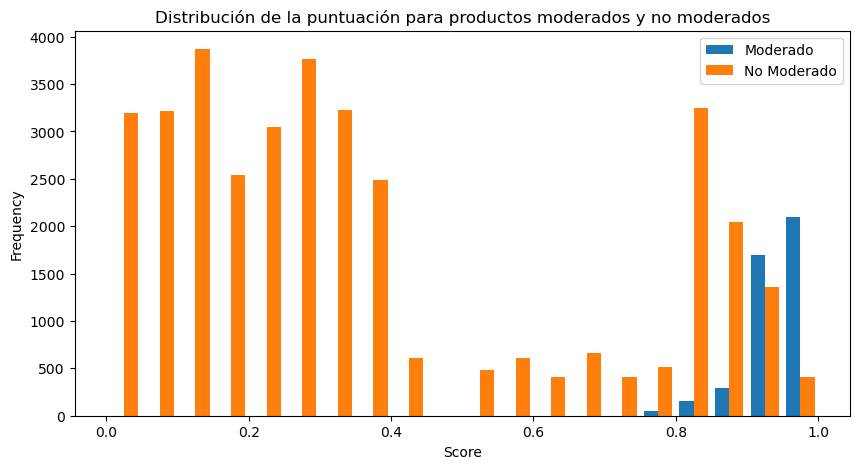

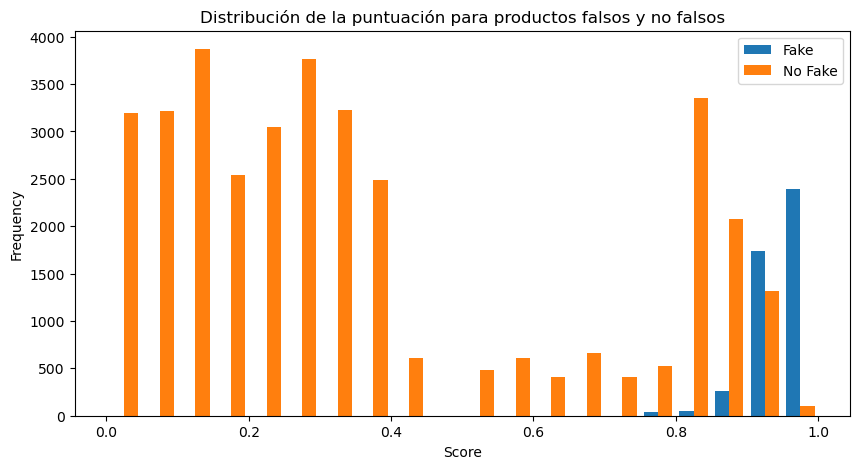

In [15]:
plt.figure(figsize=(10, 5))
plt.hist([df[df['Moderado'] == 1]['Score'], df[df['Moderado'] == 0]['Score']], bins=20, label=['Moderado', 'No Moderado'])
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribuci√≥n de la puntuaci√≥n para productos moderados y no moderados')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.hist([df[df['Fake'] == 1]['Score'], df[df['Fake'] == 0]['Score']], bins=20, label=['Fake', 'No Fake'])
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribuci√≥n de la puntuaci√≥n para productos falsos y no falsos')
plt.legend()
plt.show()

**Grafica 1**

La distribuci√≥n de productos no moderados domina en casi todas las puntuaciones bajas, lo que es esperable ya que no todos los productos publicados son moderados. Por el contrario, la proporci√≥n de productos moderados se vuelve m√°s significativa a partir de puntuaciones cercanas a 0.8, destacando una correlaci√≥n positiva entre una puntuaci√≥n alta y la probabilidad de ser moderado.

**Grafica 2**

La mayor√≠a de los productos en este rango no son falsos, lo que indica que puntuaciones m√°s bajas est√°n correlacionadas con un menor riesgo de falsificaci√≥n. Aqu√≠ se observa una tendencia opuesta, predominan los productos falsos, lo que sugiere que este rango est√° asociado con atributos que aumentan la probabilidad de que un producto sea una falsificaci√≥n (por ejemplo, nombres de marca gen√©ricos, precios inusuales o descripciones enga√±osas).


### Proporci√≥n de productos falsos por site_id y Dominio_normalizado

Proporci√≥n de productos falsos por site_id y Dominio_normalizado:
 site_id    Dominio_normalizado                
ARGENTINA  AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS     0.000000
           BODY_SKIN_CARE_PRODUCTS                11.111111
           CELLPHONES                             10.291734
           COMPUTER_MICE                           9.890110
           COMPUTER_MONITORS                      11.786372
                                                    ...    
PERU       SPEAKERS                               14.465409
           SUNGLASSES                              0.000000
           SUNSCREENS                              5.882353
           TONERS                                  0.000000
           WRISTWATCHES                           16.438356
Name: Fake, Length: 157, dtype: float64


<Figure size 1500x500 with 0 Axes>

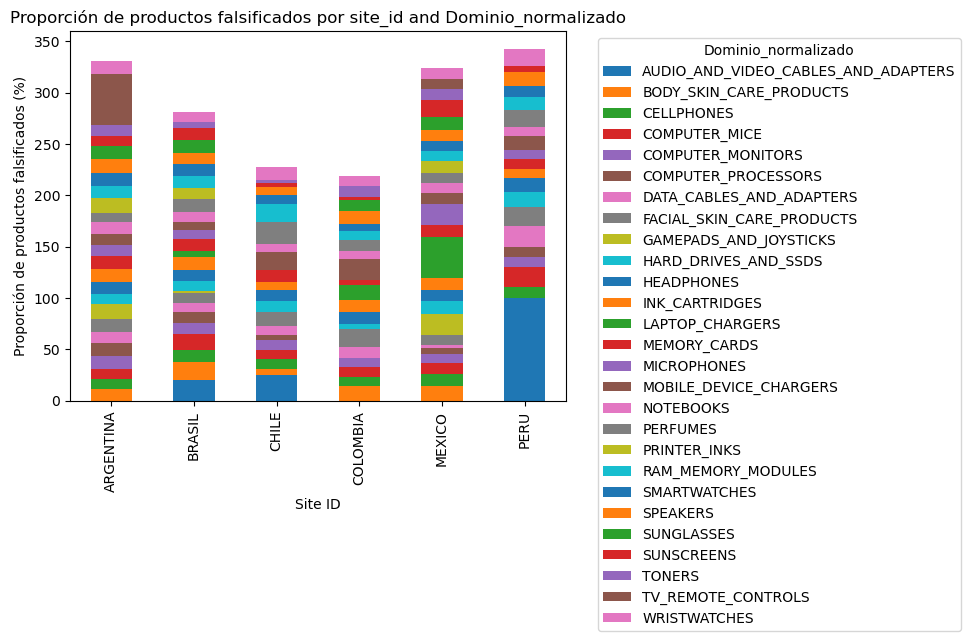

In [16]:

site_domain_fake_proportion = df.groupby(['site_id', 'Dominio_normalizado'])['Fake'].mean() * 100
print("Proporci√≥n de productos falsos por site_id y Dominio_normalizado:\n", site_domain_fake_proportion)


plt.figure(figsize=(15, 5))
site_domain_fake_proportion.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Site ID')
plt.ylabel('Proporci√≥n de productos falsificados (%)')
plt.title('Proporci√≥n de productos falsificados por site_id and Dominio_normalizado')
plt.xticks(rotation=90)
plt.legend(title='Dominio_normalizado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**1. Proporci√≥n por pa√≠s (site_id):**

Los pa√≠ses Argentina, Brasil, M√©xico y Per√∫ tienen la mayor proporci√≥n de productos falsificados, alcanzando valores similares y relativamente altos en comparaci√≥n con otros pa√≠ses como Chile y Colombia, que presentan valores m√°s bajos.

Esto sugiere que en estos pa√≠ses hay un mayor nivel de publicaciones de productos potencialmente falsificados.

**2. Dominio de productos falsificados:**

La proporci√≥n de productos falsificados est√° distribuida entre diversas categor√≠as (diferenciadas por colores en la barra apilada). Algunas categor√≠as como:

AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS

DATA_CABLES_AND_ADAPTERS

MOBILE_DEVICE_CHARGERS

SUNGLASSES

SMARTWATCHES

Estas son recurrentes en varios pa√≠ses, lo que podr√≠a indicar que estas categor√≠as tienen una mayor probabilidad de ser falsificadas. Sin embargo, el an√°lisis muestra que no hay una sola categor√≠a dominante, lo que indica una diversidad de productos afectados por falsificaciones en cada mercado.


**3. Comparaci√≥n entre pa√≠ses:**

Argentina y M√©xico presentan una proporci√≥n m√°s alta en t√©rminos absolutos de productos falsificados, lo que podr√≠a deberse a factores como:

Mayor volumen de publicaciones.

Mayor demanda en categor√≠as espec√≠ficas con alta probabilidad de falsificaci√≥n.

Chile y Colombia tienen menos categor√≠as con una proporci√≥n significativa de productos falsificados, lo que sugiere una incidencia menor de este fen√≥meno.

### Proporci√≥n de productos falsificados por Marca ay Dominio_normalizado

Proporci√≥n de productos falsificados por Marca ay Dominio_normalizado:
 Marca   Dominio_normalizado                
Apple   AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS     0.000000
        CELLPHONES                             10.911425
        COMPUTER_MICE                          35.714286
        COMPUTER_MONITORS                       0.000000
        DATA_CABLES_AND_ADAPTERS                6.410256
                                                 ...    
Xiaomi  SMARTWATCHES                            9.392265
        SPEAKERS                               15.294118
        SUNGLASSES                              0.000000
        TONERS                                  0.000000
        TV_REMOTE_CONTROLS                      0.000000
Name: Fake, Length: 193, dtype: float64


<Figure size 10000x500 with 0 Axes>

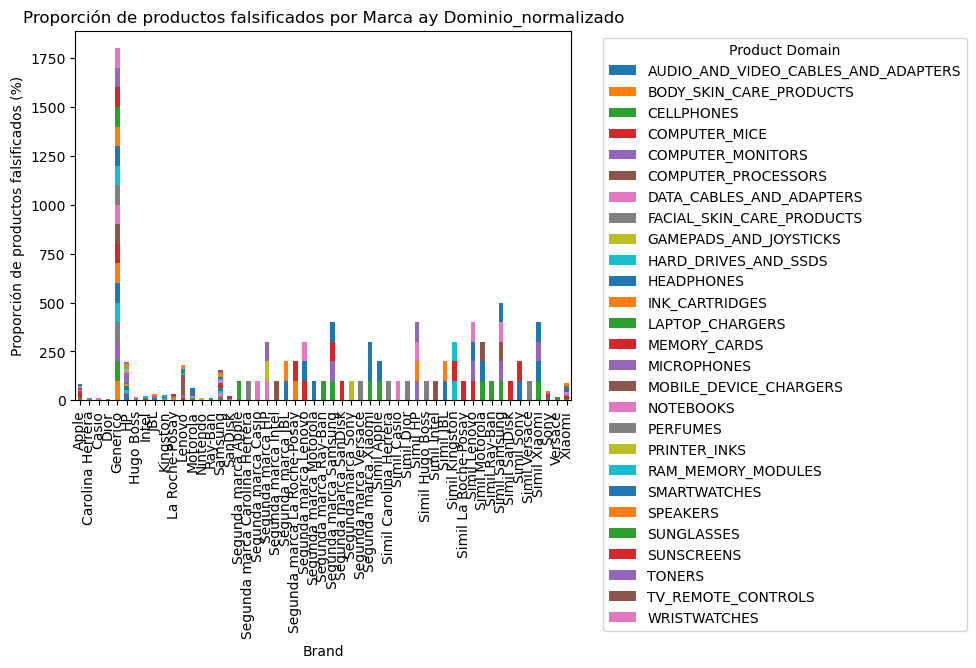

In [17]:

brand_domain_fake_proportion = df.groupby(['Marca', 'Dominio_normalizado'])['Fake'].mean() * 100
print("Proporci√≥n de productos falsificados por Marca ay Dominio_normalizado:\n", brand_domain_fake_proportion)


plt.figure(figsize=(100, 5))
brand_domain_fake_proportion.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Brand')
plt.ylabel('Proporci√≥n de productos falsificados (%)')
plt.title('Proporci√≥n de productos falsificados por Marca ay Dominio_normalizado')
plt.xticks(rotation=90)
plt.legend(title='Product Domain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Marcas con mayor proporci√≥n de falsificaciones:**

- "Gen√©rico" destaca significativamente con una proporci√≥n extremadamente alta de productos falsificados, mucho mayor que cualquier otra marca. Esto sugiere que los productos sin una marca espec√≠fica (o marcados como gen√©ricos) son m√°s propensos a ser clasificados como falsificados.

- Varias marcas etiquetadas como "Simil" (Simil HP, Simil JBL, etc.) y "Segunda Marca" (Segunda Marca Intel, Segunda Marca Ray-Ban, etc.) tambi√©n tienen altos niveles de falsificaci√≥n. Esto refuerza la idea de que las marcas que intentan imitar productos originales tienen mayor probabilidad de ser reportadas o clasificadas como falsas.

- Las marcas reconocidas y originales (como Apple, JBL, y Carolina Herrera) tienen proporciones significativamente menores de productos falsificados en comparaci√≥n con marcas gen√©ricas o imitadoras.

- Productos tecnol√≥gicos como cables, cargadores y de moda gafas de sol, perfumes son las categor√≠as m√°s afectadas. Estas categor√≠as podr√≠an ser el enfoque inicial de medidas de control.


### Visualisar la proporci√≥n de productos 'Falsos' dentro de diferentes categor√≠as de 'site_id', 'Dominio_normalizado', 'Marca' y 'Regla'

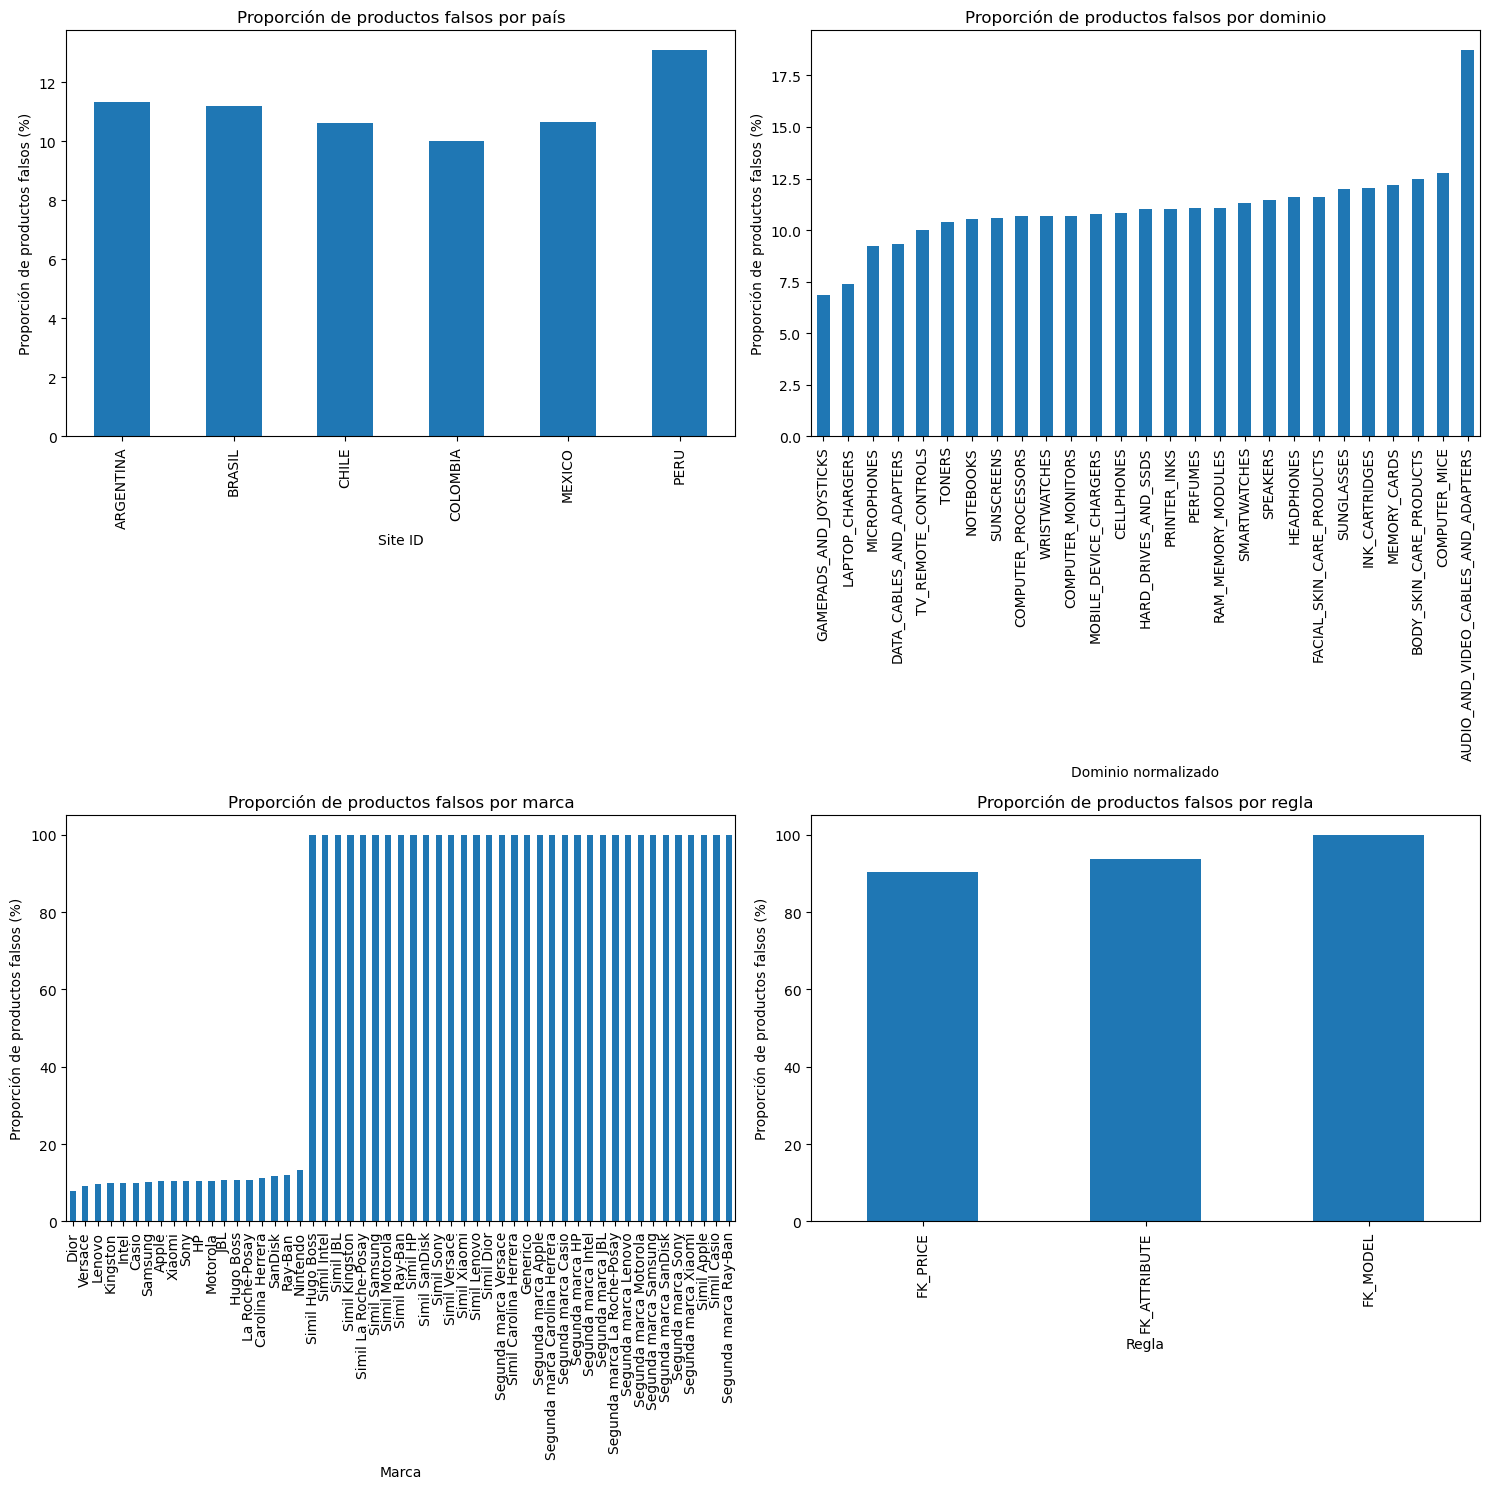

In [18]:

plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
site_fake_proportion = df.groupby('site_id')['Fake'].mean() * 100
site_fake_proportion.plot(kind='bar')
plt.xlabel('Site ID')
plt.ylabel('Proporci√≥n de productos falsos (%)')
plt.title('Proporci√≥n de productos falsos por pa√≠s')

plt.subplot(2, 2, 2)
domain_fake_proportion = df.groupby('Dominio_normalizado')['Fake'].mean() * 100
domain_fake_proportion.sort_values().plot(kind='bar')
plt.xlabel('Dominio normalizado')
plt.ylabel('Proporci√≥n de productos falsos (%)')
plt.title('Proporci√≥n de productos falsos por dominio')
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
brand_fake_proportion = df.groupby('Marca')['Fake'].mean() * 100
brand_fake_proportion.sort_values().plot(kind='bar')
plt.xlabel('Marca')
plt.ylabel('Proporci√≥n de productos falsos (%)')
plt.title('Proporci√≥n de productos falsos por marca')
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
rule_fake_proportion = df.groupby('Rule')['Fake'].mean() * 100
rule_fake_proportion.sort_values().plot(kind='bar')
plt.xlabel('Regla')
plt.ylabel('Proporci√≥n de productos falsos (%)')
plt.title('Proporci√≥n de productos falsos por regla')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Explanations (replace with your detailed analysis in Spanish)
# Gr√°fico 5: Muestra la proporci√≥n de productos falsos en cada pa√≠s.
# Gr√°fico 6: Muestra la proporci√≥n de productos falsos en cada dominio de producto.
# Gr√°fico 7: Muestra la proporci√≥n de productos falsos en cada marca.
# Gr√°fico 8: Muestra la proporci√≥n de productos falsos en cada regla aplicada.

### Distribuci√≥n de 'Rollback' por 'Regla' para comprender qu√© reglas de moderaci√≥n son propensas a ser revocadas.

In [19]:

rollback_by_rule = datos.groupby('Rule')['Rollback'].sum()


rollback_proportion_by_rule = datos.groupby('Rule')['Rollback'].mean()


print("Recuento de reversiones por regla:")
display(rollback_by_rule)

print("Proporci√≥n de reversi√≥n por regla:")
display(rollback_proportion_by_rule)

Recuento de reversiones por regla:


Rule
FK_ATTRIBUTE                 71
FK_MODEL                      0
FK_PRICE                    235
No Fue Aplicada la Regla      0
Name: Rollback, dtype: int64

Proporci√≥n de reversi√≥n por regla:


Rule
FK_ATTRIBUTE                0.056038
FK_MODEL                    0.000000
FK_PRICE                    0.091121
No Fue Aplicada la Regla    0.000000
Name: Rollback, dtype: float64

Alta incidencia en FK_PRICE: Los datos sugieren que los precios son una fuente importante de problemas en los productos moderados. Esto puede estar relacionado con errores en la entrada manual de datos, pol√≠ticas de precios inconsistentes, o intentos deliberados de manipulaci√≥n.

Atributos como foco secundario: La regla FK_ATTRIBUTE tambi√©n destaca como un √°rea que requiere atenci√≥n, posiblemente por discrepancias en los atributos de los productos (como nombres de marcas, especificaciones t√©cnicas, etc.).

Modelo y otras reglas estables: Las reversiones para la regla FK_MODEL y casos donde las reglas no fueron aplicadas son inexistentes, lo cual es positivo, ya que indica estabilidad en estas √°reas.

### Calcular la correlaci√≥n entre 'Precio', 'Score' y 'Moderado' para identificar patrones potenciales en los precios de productos moderados.

In [20]:
# Calculate the correlation matrix for 'Precio', 'Score', and 'Moderado'.
correlation_matrix = datos[['Precio', 'Score', 'Moderado']].corr()

# Display the correlation matrix.
display(correlation_matrix)

Precio     Score  Moderado
Precio    1.000000 -0.026302 -0.037265
Score    -0.026302  1.000000  0.536921
Moderado -0.037265  0.536921  1.000000

Relaci√≥n entre Precio y otras variables: El precio no tiene una correlaci√≥n fuerte ni con el score ni con la moderaci√≥n, lo que sugiere que no es un factor relevante en estas √°reas.

Importancia del Score en la Moderaci√≥n: La moderaci√≥n tiene una correlaci√≥n significativa con el score, lo que resalta que los productos revisados o validados tienden a ser percibidos como mejores o m√°s confiables.

### Identificamos las reglas que son particularmente efectivas o ineficaces para identificar productos falsificados y resumir posibles palabras clave o patrones de t√≠tulos que podr√≠an ser indicadores de productos falsificados.

Palabras m√°s comunes en los t√≠tulos de productos falsos (sin palabras irrelevantes):
      Palabra  Frecuencia
0       color        1230
1       negro         780
2         ram         649
3          gb         573
4          hp         527
5       casio         527
6   imitacion         458
7         oem         434
8         jbl         416
9         ssd         409
10      reloj         385
11      preto         385
12    calidad         379
13   premium!         379
14    samsung         376
15         ml         357
16    primera         351
17      l√≠nea         351
18        cor         341
19      intel         340


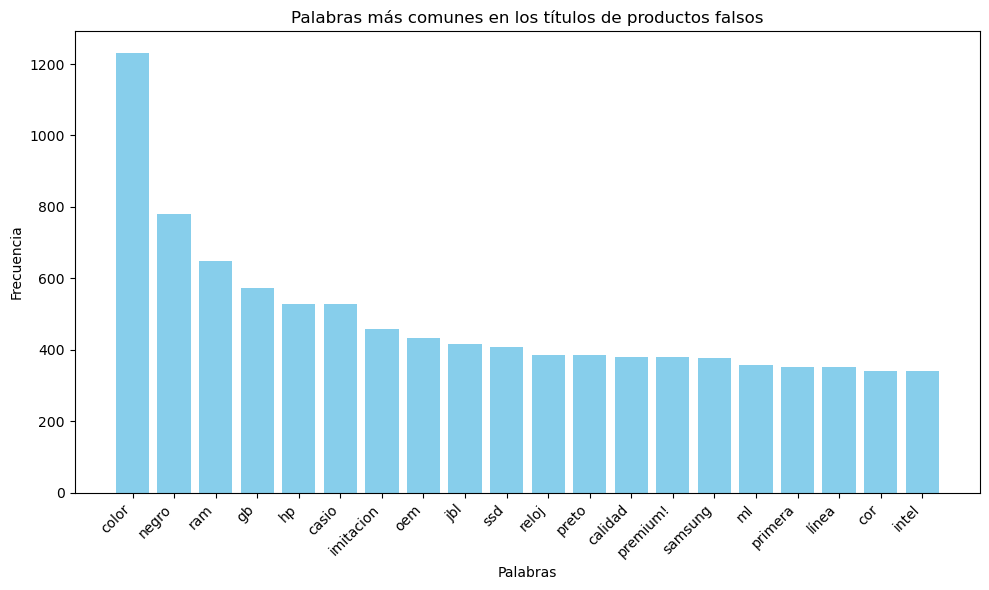

In [21]:
from collections import Counter

# Lista de palabras irrelevantes (stopwords) en espa√±ol.
stopwords = set([
    "de", "la", "el", "los", "las", "y", "en", "para", "con", "a", "del", 
    "por", "un", "una", "-", "o", "al", "lo", "e"
])

# Filtrar el dataframe para incluir solo productos 'Fake'.
fake_products = datos[datos['Fake'] == 1]

# Extraer los t√≠tulos de los productos falsos y tokenizarlos en palabras.
words = ' '.join(fake_products['Titulo']).lower().split()

# Filtrar las palabras eliminando las que est√°n en stopwords.
filtered_words = [word for word in words if word not in stopwords]

# Contar la frecuencia de cada palabra filtrada.
word_counts = Counter(filtered_words)

# Obtener las 20 palabras m√°s comunes.
most_common_words = word_counts.most_common(20)

# Convertir los datos en un DataFrame para mayor claridad.
common_words_df = pd.DataFrame(most_common_words, columns=['Palabra', 'Frecuencia'])

# Mostrar la tabla.
print("Palabras m√°s comunes en los t√≠tulos de productos falsos (sin palabras irrelevantes):")
print(common_words_df)

# Crear una gr√°fica de barras para visualizar los datos.
plt.figure(figsize=(10, 6))
plt.bar(common_words_df['Palabra'], common_words_df['Frecuencia'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Palabras m√°s comunes en los t√≠tulos de productos falsos')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


**Reglas que son especialmente eficaces para identificar falsificaciones:**

- FK_MODEL: Esta regla tiene la mayor proporci√≥n de productos ‚Äúfalsos‚Äù, lo que sugiere que es muy eficaz para detectar falsificaciones.
- FK_ATTRIBUTE: Esta regla tiene una alta proporci√≥n de productos ‚Äúfalsos‚Äù, lo que sugiere que tambi√©n es eficaz para identificar falsificaciones.
- FK_PRICE: Esta regla tiene una proporci√≥n moderada de productos ‚Äúfalsos‚Äù, pero tambi√©n tiene una alta proporci√≥n de reversiones, lo que indica que podr√≠a revocarse con frecuencia.


**Posibles palabras clave o patrones de t√≠tulos que podr√≠an ser indicadores de productos falsificados:**

- Palabras como 'imitacion', 'oem', 'calidad', 'premium!', podr√≠an indicar productos falsificados.
- Ciertas marcas como 'Casio', 'JBL', and 'Samsung' aparecer con frecuencia en los t√≠tulos de productos falsos.
- La presencia de especificaciones del producto como por ejemplo 'RAM', 'GB', 'SSD', 'ML' ambi√©n podr√≠a ser un indicio de falsificaciones.

**Conclusiones del An√°lisis Exploratorio**


**1. Hallazgos Clave**

Alta Moderaci√≥n de Productos Falsos: El 88.04% de los productos identificados como "Falsos" fueron moderados, reflejando un sistema eficiente en la detecci√≥n de irregularidades.

Tendencias Regionales: Per√∫ presenta una tasa de moderaci√≥n superior al promedio, indicando una mayor incidencia de productos falsificados en comparaci√≥n con otros pa√≠ses.

Categor√≠as Vulnerables: Las categor√≠as con mayor susceptibilidad a falsificaciones incluyen:

Controles Remotos de TV.

Cables y Adaptadores de Audio y Video.

Cables y Adaptadores de Datos.

Marcas Sospechosas: T√©rminos como ‚ÄúSegunda Marca‚Äù o ‚ÄúSimil‚Äù en los nombres de marca tienen una tasa de moderaci√≥n del 100%, siendo indicadores clave de falsificaciones.

Vendedores de Alto Riesgo: Algunos vendedores tienen tasas de moderaci√≥n superiores al 50%, sugiriendo un potencial involucramiento en actividades fraudulentas.

Correlaciones Importantes:

Productos con mayor "Score" tienen mayor probabilidad de ser falsos.

Productos de menor precio est√°n m√°s asociados con falsificaciones.

Combinaciones espec√≠ficas de pa√≠s y categor√≠a presentan patrones elevados de falsificaciones.

**2. Distribuci√≥n y Patrones**

Tendencias:

Alta coincidencia entre productos marcados como "Falsos" y su posterior moderaci√≥n.

Mayor incidencia de falsificaciones en Per√∫.

Categor√≠as espec√≠ficas destacan por su alta vulnerabilidad.

Anomal√≠as:

Marcas con t√©rminos gen√©ricos o ambiguos tienen tasas de moderaci√≥n extremadamente altas.

Algunos vendedores concentran actividades sospechosas.

Concentraciones Inusuales:

Patrones regionales en ciertas categor√≠as y pa√≠ses, como Per√∫, con mayores tasas de falsificaciones.

**3. Oportunidades y Hallazgos Inesperados**

Patrones Regionales: La concentraci√≥n de productos falsificados en Per√∫ sugiere la necesidad de estrategias regionalizadas.

Detecci√≥n por Palabras Clave: T√©rminos espec√≠ficos en nombres de marca podr√≠an ser un m√©todo r√°pido para identificar falsificaciones.

Auditor√≠as: Los vendedores con altas tasas de moderaci√≥n justifican revisiones proactivas para mitigar actividades fraudulentas.

Modelos Predictivos: Existe potencial para desarrollar modelos de machine learning con variables como "Score", precio, categor√≠a y regi√≥n para mejorar la detecci√≥n de falsificaciones.

**4. Estrategias para Mejorar la Detecci√≥n**

Personalizaci√≥n Regional:

Implementar medidas espec√≠ficas para pa√≠ses con alta incidencia, como Per√∫.

Realizar campa√±as educativas y reforzar la regulaci√≥n local.

Procesamiento del Lenguaje Natural (PLN):

Usar t√©cnicas como BERT para identificar patrones en descripciones sospechosas.

Sistema de Alertas:

Priorizar moderaci√≥n en productos con altos "Scores" o palabras clave sospechosas.

Auditor√≠as de Vendedores:

Revisar frecuentemente a vendedores con altas tasas de moderaci√≥n.

Visi√≥n Computacional:

Detectar diferencias visuales entre productos aut√©nticos y falsificados mediante an√°lisis de im√°genes.

**5. Impacto en el Marketplace**

Compradores:

La confianza y experiencia del cliente disminuyen con productos falsificados.

Riesgo de seguridad al adquirir productos no genuinos.

Vendedores Leg√≠timos:

Competencia desleal por precios m√°s bajos de productos falsos.

Impacto negativo en la reputaci√≥n de sus productos genuinos.

Plataforma:

P√©rdida de ingresos por disminuci√≥n de clientes y vendedores leg√≠timos.

Riesgos legales por facilitar la venta de falsificaciones.

Deterioro de la reputaci√≥n del marketplace.

**6. Prevenci√≥n y Soluciones**

- T√°cticas de Evasi√≥n:

Utilizar descripciones ambiguas o enga√±osas para evitar la detecci√≥n por palabras clave.

Publicar productos en categor√≠as incorrectas para evitar reglas espec√≠ficas de cada categor√≠a.

Crear m√∫ltiples cuentas para eludir las restricciones impuestas a un vendedor individual.

Solicitar a compradores c√≥mplices que dejen rese√±as positivas falsas.

- Soluciones Proactivas:

Implementar sistemas de detecci√≥n de patrones de comportamiento sospechoso.

Utilizar t√©cnicas de aprendizaje autom√°tico para identificar descripciones y t√≠tulos enga√±osos.

Establecer l√≠mites en la cantidad de productos que nuevos vendedores pueden publicar.

Analizar las redes de conexi√≥n entre vendedores para identificar y desmantelar operaciones fraudulentas.

**7. Estrategias de Detecci√≥n**

An√°lisis de Im√°genes: Utilizar visi√≥n artificial para analizar las im√°genes de los productos e identificar diferencias sutiles entre productos originales y falsificados.

An√°lisis de Redes: Identificar conexiones entre vendedores de falsificaciones para desmantelar redes de operaci√≥n.

Colaboraci√≥n con Marcas: Establecer un programa de verificaci√≥n y autenticaci√≥n de productos en colaboraci√≥n con las marcas.

Informaci√≥n Externa: Incorporar informaci√≥n de otras fuentes, como bases de datos de productos falsificados o listas de vendedores sospechosos.

Inteligencia Artificial Generativa: Desarrollar un sistema de inteligencia artificial generativa (como un LLM) que sea capaz de analizar las descripciones de los productos y puntuar su probabilidad de autenticidad, bas√°ndose en el contexto de las marcas.